In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import stellargraph as sg
from stellargraph.mapper import PaddedGraphGenerator
from stellargraph.layer import DeepGraphCNN
from stellargraph import StellarGraph
from sklearn import model_selection

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import binary_crossentropy
import tensorflow as tf


2023-03-13 11:04:35.352198: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-13 11:04:35.427628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-13 11:04:35.428072: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-13 11:04:35.431836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [1]:
import pickle
with open('../data/graph_label_list.pkl','rb') as f:
  graph_label_list=pickle.load(f)
with open('../data/graph_list.pkl','rb') as f:
  graph_list=pickle.load(f)

2023-02-27 10:09:09.522438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 10:09:10.554461: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:
2023-02-27 10:09:10.554581: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:
2023-02-27 10:09:10.554591: W tensorflow/compiler/tf2tensorrt/util

In [4]:
graph_label_list = pd.get_dummies(graph_label_list, drop_first=True)
graph_label_list.value_counts().to_frame()

,0
1,
0,896
1,896


In [14]:
type(graph_label_list[1][1791])

numpy.uint8

In [30]:
bennode=[]
malnode=[]
benedge=[]
maledge=[]
for i in range(len(graph_list)):
  g=graph_list[i]
  if graph_label_list[1][i]==0:
    bennode.append(g.number_of_nodes())
    benedge.append(g.number_of_edges())
  else:
    malnode.append(g.number_of_nodes())
    maledge.append(g.number_of_edges())

In [55]:
with open('total.csv','w') as f:
  for i in bennode:
    f.write(str(i)+',')
  f.write('\n')
  for i in benedge:
    f.write(str(i)+',')
  f.write('\n')
  for i in malnode:
    f.write(str(i)+',')
  f.write('\n')
  for i in maledge:
    f.write(str(i)+',')
  f.write('\n')

In [28]:
import csv
with open('total.csv','w') as f:
  writer=csv.writer(f)
  writer.writerows((k,benedge[k]) for k in benedge)

In [51]:
pd_bennode=pd.cut(bennode,bins=[x*100 for x in range(11)])

In [53]:
pd_bennode.value_counts()

(0, 100]       154
(100, 200]     205
(200, 300]     170
(300, 400]     101
(400, 500]      70
(500, 600]      48
(600, 700]      38
(700, 800]      42
(800, 900]      39
(900, 1000]     29
dtype: int64

/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


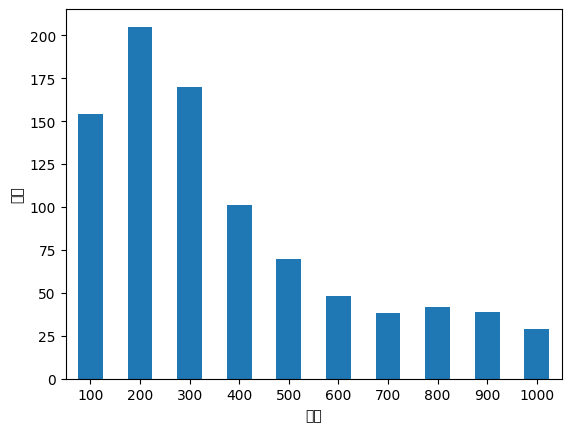

In [59]:
import matplotlib.pyplot as plt
values = pd_bennode.value_counts().values
labels = [x*100 for x in range(11)][-10:]
df = pd.DataFrame(values, index=labels)
df.plot(kind='bar', legend=False)
plt.xticks(rotation=0)
plt.ylabel('频数')
plt.xlabel('区间')
plt.show()



/tmp/ipykernel_83935/1830100679.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


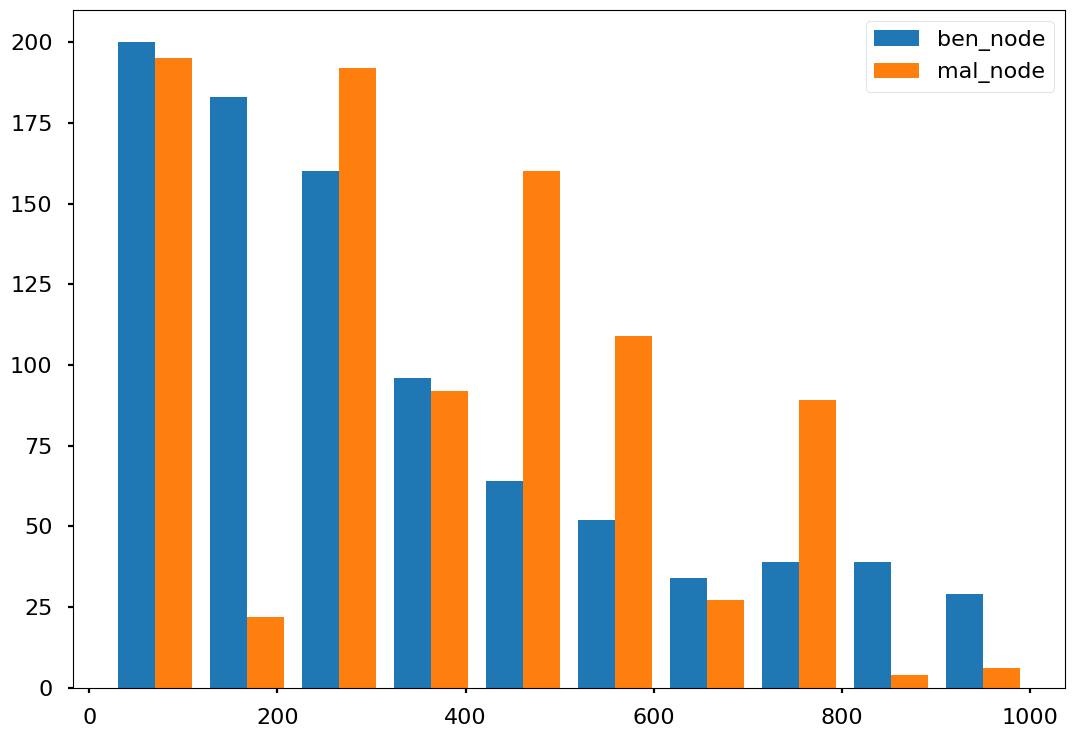

In [79]:
plt.style.use('seaborn-poster')

plt.hist([bennode,malnode],bins=10,label=['ben_node','mal_node'])
plt.rcParams.update({'font.size':20})
plt.legend()
# plt.show()
plt.savefig('./nodes')

/tmp/ipykernel_83935/4174848943.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


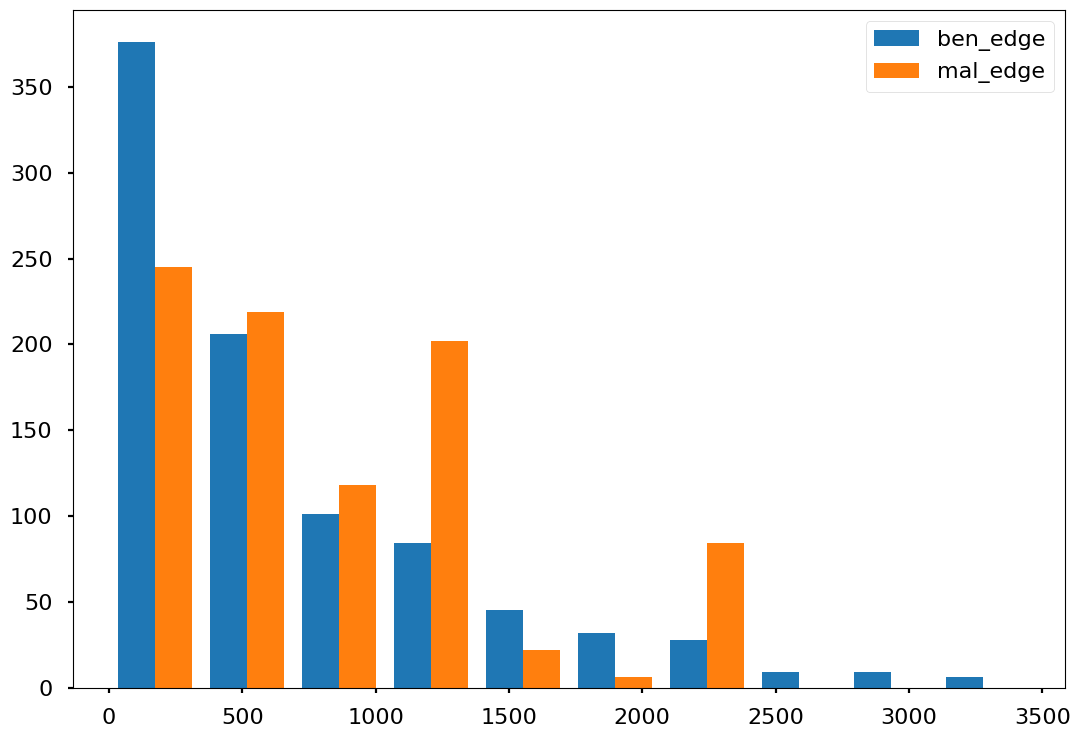

In [80]:
plt.style.use('seaborn-poster')

plt.hist([benedge,maledge],bins=10,label=['ben_edge','mal_edge'])
plt.rcParams.update({'font.size':20})
plt.legend()
# plt.show()
plt.savefig('./edges')

In [29]:
summary = pd.DataFrame(
    [(g.number_of_nodes(), g.number_of_edges(),graph_label_list.(g)) for g in graph_list],
    columns=["nodes", "edges",'label'],
)
summary.describe().round(1)

TypeError: 'RangeIndex' object is not callable

In [23]:
summary.cumprod(axis=1)

,nodes,edges
0,596,1135976
1,238,154700
2,143,32747
3,156,42900
4,50,2300
...,...,...
1787,140,31640
1788,778,1672700
1789,205,30135
1790,710,1064290


In [3]:
eva_model = tf.keras.models.load_model('../models/best')
# eva_model.load_weights('checkpoint/weights.022118-0.98.hdf5')

NameError: name 'tf' is not defined

In [84]:
eva_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, 1443)  0           []                               
                                ]                                                                 
                                                                                                  
 dropout_10 (Dropout)           (None, None, 1443)   0           ['input_7[0][0]']                
                                                                                                  
 input_9 (InputLayer)           [(None, None, None)  0           []                               
                                ]                                                                 
                                                                                            

In [6]:
train_graphs, test_graphs = model_selection.train_test_split(
    graph_label_list, train_size=0.9, test_size=None, stratify=graph_label_list,
)
gen = PaddedGraphGenerator(graphs=graph_list)
test_gen = gen.flow(
    list(test_graphs.index - 1),
    targets=test_graphs.values,
    batch_size=1,
    symmetric_normalization=False,
)

train_gen = gen.flow(
    list(train_graphs.index - 1),
    targets=train_graphs.values,
    batch_size=1,
    symmetric_normalization=False,
)


In [2]:
y_pred = eva_model.predict(test_gen)

NameError: name 'eva_model' is not defined

In [25]:
#以下画图用
import pickle
import csv

with open('malconv_test_index.pkl','rb') as f:
  x_test=pickle.load(f)
x_test=[i.split('/')[-1] for i in x_test]
with open('procgcn_pred.pkl','rb') as f:
  procgcn_pred=pickle.load(f)
with open('procgcn_y_true.pkl','rb') as f:
  procgcn_true=pickle.load(f)

malconv_pred=[]
malconv_true=[]
with open('myres.csv','r') as rf:
  reader=csv.reader(rf)
  for row in reader:
    if row[0] in x_test:
      malconv_pred.append(float(row[2]))
      malconv_true.append(int(row[1]))

with open('smo_output','rb') as f:
  smo_pred=pickle.load(f)#smo输出是【-1，1】
  
with open('smo_testy','rb') as f:
  smo_true=pickle.load(f)

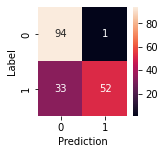

In [26]:
smo_pred=np.array([(i/2)+0.5 for i in smo_pred]) #smo输出是【-1，1】
smo_true=np.array([(i/2)+0.5 for i in smo_true])
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
# y_pred = eva_model.predict(test_gen)
y_pred1 = smo_pred.round() #输出是置信度，按四舍五入作为分类
y_true = smo_true
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred1)
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_mtx,
            xticklabels=[0,1],
            yticklabels=[0,1],
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import norm
import numpy as np
def AUC_CI(auc, label, alpha = 0.05):
	label = np.array(label)#防止label不是array类型
	n1, n2 = np.sum(label == 1), np.sum(label == 0)
	q1 = auc / (2-auc)
	q2 = (2 * auc ** 2) / (1 + auc)
	se = np.sqrt((auc * (1 - auc) + (n1 - 1) * (q1 - auc ** 2) + (n2 -1) * (q2 - auc ** 2)) / (n1 * n2))
	confidence_level = 1 - alpha
	z_lower, z_upper = norm.interval(confidence_level)
	lowerb, upperb = auc + z_lower * se, auc + z_upper * se
	return (lowerb, upperb)
import matplotlib.pyplot as plt
def plot_AUC(ax, FPR, TPR, AUC, CI, label):
	label = '{}: {} ({}-{})'.format(str(label), round(AUC, 3), round(CI[0], 3), round(CI[1], 3))
	ax.plot(FPR, TPR, label = label)
	return ax

#label是每个样本对应的真实标签(0或1)，pred_prob是模型输出的对每个样本的预测概率
proc_FPR, proc_TPR, _ = roc_curve(procgcn_true, procgcn_pred, pos_label = 1)
proc_AUC = roc_auc_score(procgcn_true, procgcn_pred)
proc_CI = AUC_CI(proc_AUC, procgcn_true, 0.05)

malconv_FPR, malconv_TPR, _ = roc_curve(malconv_true, malconv_pred, pos_label = 1)
malconv_AUC = roc_auc_score(malconv_true, malconv_pred)
malconv_CI = AUC_CI(malconv_AUC, malconv_true, 0.05)

smo_FPR, smo_TPR, _ = roc_curve(smo_true, smo_pred, pos_label = 1)
smo_AUC = roc_auc_score(smo_true, smo_pred)
smo_CI = AUC_CI(malconv_AUC, malconv_true, 0.05)


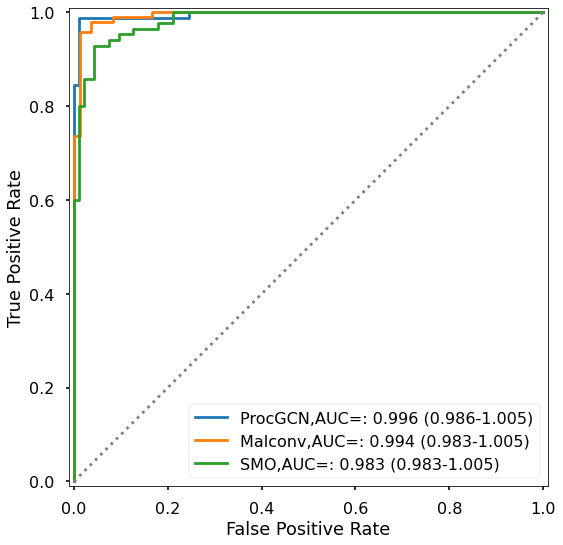

In [33]:
plt.style.use('seaborn-poster')
fig, ax = plt.subplots()
ax = plot_AUC(ax, proc_FPR, proc_TPR, proc_AUC, proc_CI,label='ProcGCN,AUC=')
ax = plot_AUC(ax, malconv_FPR, malconv_TPR, malconv_AUC, malconv_CI, label = 'Malconv,AUC=')
ax = plot_AUC(ax, smo_FPR, smo_TPR, smo_AUC, smo_CI, label = 'SMO,AUC=')
ax.plot((0, 1), (0, 1), ':', color = 'grey')
# ax.patch.set_facecolor('white')
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(-0.01, 1.01)
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
# plt.show()
plt.savefig('auc.png')
